# BeautifulSoup

### 解析库

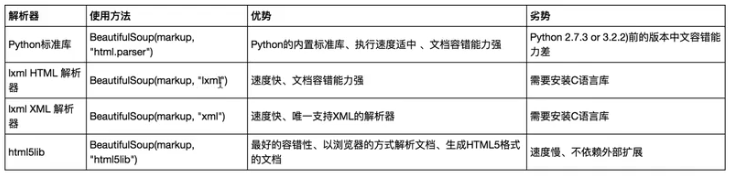

The Dormouse's story 👉 http://technomerc.com/

In [1]:
html = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title" name="dormouse">
<b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
"""
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'lxml')
# print(soup.prettify()) # 美化 html 代码, 补全未关闭标签尾
print(soup.title.string) # 获取内容
print("=========---- 选择元素(若有多个标签, 只返回第一个结果) ----==========")
print(soup.title)
print(type(soup.title))
print(soup.head)
print(soup.p)
print("=========---- 获取名称 ----==========")
print(soup.title.name)
print("=========---- 获取属性 ----==========")
print(soup.p.attrs['name'])
print(soup.p['name'])
print(soup.p['class'])
print("=========---- 嵌套选择 ----==========")
print(soup.head.title.string)
print("=========---- 子节点和子孙节点 ----==========")
print(soup.p.contents)

The Dormouse's story
=========---- 选择元素(若有多个标签, 只返回第一个结果) ----==========
<title>The Dormouse's story</title>
<class 'bs4.element.Tag'>
<head><title>The Dormouse's story</title></head>
<p class="title" name="dormouse">
<b>The Dormouse's story</b></p>
=========---- 获取名称 ----==========
title
=========---- 获取属性 ----==========
dormouse
dormouse
['title']
=========---- 嵌套选择 ----==========
The Dormouse's story
=========---- 子节点和子孙节点 ----==========
['\n', <b>The Dormouse's story</b>]


In [2]:
# 子节点和子孙节点 contents
html = """
<html>
    <head>
        <title>The Dormouse's story</title>
    </head>
    <body>
        <p class="story">
        Once upon a time there were three little sisters; and their names were
            <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
            <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
            <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.
        </p>
        <p class="story">...</p>
"""
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'lxml')
print(soup.p.contents) # 获取找到的第一个p标签的内容

['\n        Once upon a time there were three little sisters; and their names were\n            ', <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, ',\n            ', <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, ' and\n            ', <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>, ';\nand they lived at the bottom of a well.\n        ']


In [39]:
# 子节点和子孙节点 children
html = """
<html>
    <head>
        <title>The Dormouse's story</title>
    </head>
    <body>
        <p class="story">
        Once upon a time there were three little sisters; and their names were
            <a href="http://example.com/elsie" class="sister" id="link1">
                <span>Elsie</span>
            </a>,
            <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> 
            and
            <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.
        </p>
        <p class="story">...</p>
"""
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'lxml')
print(soup.p.children) # 获取找到的第一个p标签的内容
for i,child in enumerate(soup.p.children):
    print(i,child)

0 
        Once upon a time there were three little sisters; and their names were
            
1 <a class="sister" href="http://example.com/elsie" id="link1">
<span>Elsie</span>
</a>
2 ,
            
3 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
4  
            and
            
5 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
6 ;
and they lived at the bottom of a well.
        


In [42]:
# 子节点和子孙节点 descendants
html = """
<html>
    <head>
        <title>The Dormouse's story</title>
    </head>
    <body>
        <p class="story">
        Once upon a time there were three little sisters; and their names were
            <a href="http://example.com/elsie" class="sister" id="link1">
                <span>Elsie</span>
            </a>,
            <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> 
            and
            <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.
        </p>
        <p class="story">...</p>
"""
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'lxml')
print(soup.p.descendants)
for i,child in enumerate(soup.p.descendants):
    print(i,child)

<generator object Tag.descendants at 0x000001B0F877E0A0>
0 
        Once upon a time there were three little sisters; and their names were
            
1 <a class="sister" href="http://example.com/elsie" id="link1">
<span>Elsie</span>
</a>
2 

3 <span>Elsie</span>
4 Elsie
5 

6 ,
            
7 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>
8 Lacie
9  
            and
            
10 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
11 Tillie
12 ;
and they lived at the bottom of a well.
        


In [43]:
# 父节点和祖先节点
html = """
<html>
    <head>
        <title>The Dormouse's story</title>
    </head>
    <body>
        <p class="story">
        Once upon a time there were three little sisters; and their names were
            <a href="http://example.com/elsie" class="sister" id="link1">
                <span>Elsie</span>
            </a>,
            <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> 
            and
            <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.
        </p>
        <p class="story">...</p>
"""
import lxml
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'lxml')
print(soup.a.parent)

<p class="story">
        Once upon a time there were three little sisters; and their names were
            <a class="sister" href="http://example.com/elsie" id="link1">
<span>Elsie</span>
</a>,
            <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> 
            and
            <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.
        </p>


In [1]:
# 兄弟节点

--------------------====================-------------------

In [10]:
# 标准选择器
# find_all()

html = """
<div class="panel">
    <div class="panel-heading">
        <h4>一个嵌套列表：</h4>
    </div>
    <div class="panel-body">
        <ul type="disc" class="list" id="list-1">
            <li class="element">苹果</li>
            <li class="element">香蕉</li>
            <li class="element">柠檬</li>
        </ul>  
        <ul type="circle" class="list list-small" id="list-2" name="fruits">
            <li class="element">苹</li>
            <li class="element">香</li>
            <li class="element">柠</li>
        </ul>
        <ul type="square" class="list" id="list-3">
            <li class="element">蕉</li>
            <li class="element">檬</li>
        </ul>
    </div>
</div>
"""
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'lxml')

############################### find_all
# print(soup.find_all('ul'))
# print(soup.find_all('ul')[1])

# soup.find_all  &  标签.find_all
for p in soup.find_all('ul'):
    print(p.find_all('li'))

# 使用 attrs
# print(soup.find_all(attrs={'id':'list-1'}))
# print(soup.find_all(attrs={'class':'list'}))
# print(soup.find_all(attrs={'name':'fruits'}))

# print(soup.find_all(id='list-1'))
# print(soup.find_all(class_='element'))
# print(soup.find_all(text='香'))

############################### find
# print(soup.find(text='香'))
# print(soup.find('li'))
# print(soup.find(id='link2'))
# print(soup.find(id='page666'))

# ✨
# html = soup.find('ul',id='list-1')
# str(html) #返回原生字符串
# html.get_text()
print(html)

[<li class="element">苹果</li>, <li class="element">香蕉</li>, <li class="element">柠檬</li>]
[<li class="element">苹</li>, <li class="element">香</li>, <li class="element">柠</li>]
[<li class="element">蕉</li>, <li class="element">檬</li>]

<div class="panel">
    <div class="panel-heading">
        <h4>一个嵌套列表：</h4>
    </div>
    <div class="panel-body">
        <ul type="disc" class="list" id="list-1">
            <li class="element">苹果</li>
            <li class="element">香蕉</li>
            <li class="element">柠檬</li>
        </ul>  
        <ul type="circle" class="list list-small" id="list-2" name="fruits">
            <li class="element">苹</li>
            <li class="element">香</li>
            <li class="element">柠</li>
        </ul>
        <ul type="square" class="list" id="list-3">
            <li class="element">蕉</li>
            <li class="element">檬</li>
        </ul>
    </div>
</div>



# CSS选择器

In [59]:
html = """
<div class="panel">
    <div class="panel-heading">
        <h4>一个嵌套列表：</h4>
    </div>
    <div class="panel-body">
        <ul type="disc" class="list" id="list-1">
            <li class="element">苹果</li>
            <li class="element">香蕉</li>
            <li class="element">柠檬</li>
        </ul>  
        <ul type="circle" class="list list-small" id="list-2">
            <li class="element">苹</li>
            <li class="element">香</li>
            <li class="element">柠</li>
        </ul>
        <ul type="square" class="list" id="list-3">
            <li class="element">蕉</li>
            <li class="element">檬</li>
        </ul>
    </div>
</div>
"""
from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'lxml')
print(soup.select('.panel .panel-heading'))
print(soup.select('ul li'))
print(soup.select('#list-2 .element'))
print(type(soup.select('ul')[0]))

print("--------------- 使用select -------------------")
for ul in soup.select('ul'):
    print(ul.select('li'))
print("--------------- 属性 -------------------")
for ul in soup.select('ul'):
    print(ul['id'])
    print(ul.attrs['id'])
print("--------------- 文本 -------------------")
for ul in soup.select('ul'):
    print(ul.get_text())
    

[<div class="panel-heading">
<h4>一个嵌套列表：</h4>
</div>]
[<li class="element">苹果</li>, <li class="element">香蕉</li>, <li class="element">柠檬</li>, <li class="element">苹</li>, <li class="element">香</li>, <li class="element">柠</li>, <li class="element">蕉</li>, <li class="element">檬</li>]
[<li class="element">苹</li>, <li class="element">香</li>, <li class="element">柠</li>]
<class 'bs4.element.Tag'>
--------------- 使用select -------------------
[<li class="element">苹果</li>, <li class="element">香蕉</li>, <li class="element">柠檬</li>]
[<li class="element">苹</li>, <li class="element">香</li>, <li class="element">柠</li>]
[<li class="element">蕉</li>, <li class="element">檬</li>]
--------------- 属性 -------------------
list-1
list-1
list-2
list-2
list-3
list-3
--------------- 文本 -------------------

苹果
香蕉
柠檬


苹
香
柠


蕉
檬



### 总结

- 推荐使用lxml解析库, 必要时使用html.parser
- 标签筛选功能弱但是速度快
- 建议使用find()、find_all()查询匹配单个结果或多个结果
- 如果对CSS选择器熟悉建议使用select()
- 记住常用的获取属性和文本值的方法